# Data Analysis

#### Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

#### Read annotation files

In [2]:
base_path = 'data/In-shop Clothes Retrieval Benchmark'
attr_cloth_file = os.path.join(base_path, 'Anno/attributes/list_attr_cloth.txt')
attr_items_file = os.path.join(base_path, 'Anno/attributes/list_attr_items.txt')
splits_file = os.path.join(base_path, 'Eval/list_eval_partition.txt')

In [3]:
attrs = pd.read_csv(attr_cloth_file, header=1)
attrs = attrs['attribute_name'].values.tolist()
len(attrs)

463

In [9]:
labels = pd.read_csv(attr_items_file, sep=' ', names=attrs, skiprows=2)
labels['sum_T'] = labels[labels==1].sum(axis=1)
labels['sum_F'] = labels[labels==-1].sum(axis=1) * -1

In [10]:
splits = pd.read_csv(splits_file, sep='\s+', header=1)
splits['sex'] = splits.apply(lambda row: row['image_name'].split('/')[1], axis=1)
splits['category'] = splits.apply(lambda row: row['image_name'].split('/')[2], axis=1)
splits

,image_name,item_id,evaluation_status,sex,category
0,img/WOMEN/Dresses/id_00000002/02_1_front.jpg,id_00000002,train,WOMEN,Dresses
1,img/WOMEN/Dresses/id_00000002/02_2_side.jpg,id_00000002,train,WOMEN,Dresses
2,img/WOMEN/Dresses/id_00000002/02_4_full.jpg,id_00000002,train,WOMEN,Dresses
3,img/WOMEN/Dresses/id_00000002/02_7_additional.jpg,id_00000002,train,WOMEN,Dresses
4,img/WOMEN/Skirts/id_00000003/02_1_front.jpg,id_00000003,train,WOMEN,Skirts
...,...,...,...,...,...
52707,img/WOMEN/Jackets_Coats/id_00007982/12_7_addit...,id_00007982,gallery,WOMEN,Jackets_Coats
52708,img/WOMEN/Jackets_Coats/id_00007982/13_1_front...,id_00007982,query,WOMEN,Jackets_Coats
52709,img/WOMEN/Jackets_Coats/id_00007982/13_2_side.jpg,id_00007982,gallery,WOMEN,Jackets_Coats
52710,img/WOMEN/Jackets_Coats/id_00007982/13_3_back.jpg,id_00007982,query,WOMEN,Jackets_Coats


#### Data splits

Number of images per dataset split.

In [11]:
splits.groupby('evaluation_status').size()

evaluation_status
gallery    12612
query      14218
train      25882
dtype: int64

In [12]:
splits.groupby('sex').size()

sex
MEN       7838
WOMEN    44874
dtype: int64

In [13]:
splits.groupby(['evaluation_status', 'sex']).size()

evaluation_status  sex  
gallery            MEN       2000
                   WOMEN    10612
query              MEN       2243
                   WOMEN    11975
train              MEN       3595
                   WOMEN    22287
dtype: int64

In [14]:
splits.groupby(['evaluation_status', 'sex', 'category']).size()

evaluation_status  sex    category           
gallery            MEN    Denim                    96
                          Jackets_Vests            81
                          Pants                   284
                          Shirts_Polos            206
                          Shorts                  229
                                                 ... 
train              WOMEN  Shorts                 1631
                          Skirts                  886
                          Sweaters               1642
                          Sweatshirts_Hoodies     414
                          Tees_Tanks             5983
Length: 69, dtype: int64

In [15]:
labels

,lightweight,polyester,woven,knit,cotton,unlined,rayon,spandex,top,print,...,invisible back zipper,concealed side zipper,front slant pocket,front patch pocket,adjustable cami strap,adjustable spaghetti strap,back patch pocket,invisible side zipper,sum_T,sum_F
id_00000001,1,1,1,-1,-1,1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,15.0,448.0
id_00000002,1,-1,1,-1,-1,1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00000003,1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00000004,1,-1,1,-1,-1,1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00000005,1,1,1,-1,1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,28.0,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_00007978,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,25.0,438.0
id_00007979,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,17.0,446.0
id_00007980,1,1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,22.0,441.0
id_00007981,-1,1,-1,1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,12.0,451.0


In [16]:
print(labels[['sum_T','sum_F']].describe())

             sum_T        sum_F
count  8081.000000  8081.000000
mean     19.756466   443.243534
std       5.498185     5.498185
min       0.000000   422.000000
25%      16.000000   440.000000
50%      19.000000   444.000000
75%      23.000000   447.000000
max      41.000000   463.000000
             lightweight  polyester  woven  knit  cotton  unlined  rayon  \
id_00001572           -1         -1     -1    -1      -1       -1     -1   
id_00005085           -1         -1     -1    -1      -1       -1     -1   

             spandex  top  print  ...  invisible back zipper  \
id_00001572       -1   -1     -1  ...                     -1   
id_00005085       -1   -1     -1  ...                     -1   

             concealed side zipper  front slant pocket  front patch pocket  \
id_00001572                     -1                  -1                  -1   
id_00005085                     -1                  -1                  -1   

             adjustable cami strap  adjustable spaghett

These items have no attributes set to true.

In [21]:
labels[labels['sum_T'] == 0]

,lightweight,polyester,woven,knit,cotton,unlined,rayon,spandex,top,print,...,invisible back zipper,concealed side zipper,front slant pocket,front patch pocket,adjustable cami strap,adjustable spaghetti strap,back patch pocket,invisible side zipper,sum_T,sum_F
id_00001572,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0.0,463.0
id_00005085,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0.0,463.0


In [17]:
true_counts_per_col = labels[labels==1].count().values.tolist()
print(true_counts_per_col)

[5072, 3831, 3918, 4006, 3417, 2954, 2623, 2001, 2112, 1918, 1362, 1769, 1468, 4375, 1947, 1490, 1691, 1108, 1303, 1209, 976, 998, 911, 1136, 829, 808, 873, 642, 679, 711, 26, 692, 669, 2207, 647, 642, 625, 636, 609, 608, 0, 670, 680, 616, 687, 547, 571, 526, 443, 717, 544, 670, 3099, 541, 618, 1660, 516, 836, 12, 764, 519, 477, 1108, 744, 0, 537, 450, 452, 543, 515, 713, 428, 425, 408, 440, 404, 400, 398, 353, 399, 399, 478, 377, 426, 342, 629, 622, 539, 366, 437, 367, 360, 1649, 328, 329, 337, 348, 334, 325, 491, 322, 310, 325, 324, 701, 396, 312, 310, 869, 317, 297, 690, 303, 299, 385, 248, 296, 323, 346, 288, 289, 268, 289, 292, 282, 288, 213, 248, 280, 282, 274, 351, 680, 245, 269, 294, 354, 270, 260, 376, 260, 379, 261, 665, 262, 276, 371, 270, 629, 247, 212, 237, 236, 257, 213, 251, 254, 223, 198, 186, 229, 192, 148, 0, 185, 183, 218, 190, 442, 189, 189, 34, 212, 199, 185, 194, 213, 182, 234, 176, 156, 178, 163, 202, 170, 193, 173, 146, 210, 172, 145, 301, 171, 195, 160, 163, 19

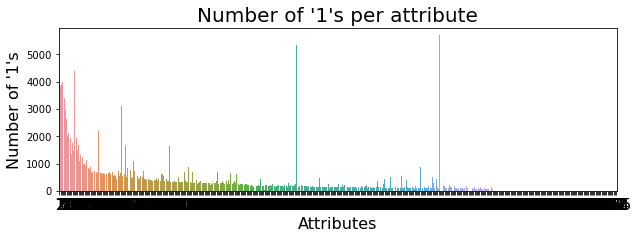

In [18]:
plt.figure(figsize=(10, 3))
ax = sns.barplot(y=list(true_counts_per_col), x=list(labels.keys()))
plt.title("Number of '1's per attribute", fontsize=20)
plt.xlabel("Attributes", fontsize=16)
ax.set_xticklabels(range(1, len(true_counts_per_col)+1), rotation=0, fontsize=16)
plt.ylabel("Number of '1's", fontsize=16)
plt.show()

The following attributes are never true for all images the entire dataset across all splits.

In [19]:
[attr for attr, count in zip(attrs, true_counts_per_col) if count == 0]

['black-cream',
 'black-white',
 'heather grey',
 'burgundy',
 'olive',
 'navy',
 'cream-navy',
 'blush',
 'blue-cream',
 'navy-white',
 'taupe',
 'denim washed',
 'black-heather grey',
 'black-red',
 'blue-white',
 'round neckline',
 'long sleeve',
 'fully lined',
 'short sleeve',
 'elasticized waist',
 'front pocket',
 'back zipper',
 'partially lined',
 'zip fly',
 'patch pocket',
 'ribbed trim',
 'drawstring waist',
 'crop top',
 'crew neck',
 'basic collar',
 '3/4 sleeve',
 'keyhole back',
 'open front',
 'faux leather',
 'buttoned keyhole',
 'side zipper',
 'buttoned front',
 'chest patch',
 'elasticized drawstring',
 'exposed back',
 'chest pocket',
 'muscle tee',
 'relaxed fit',
 'skinny jean',
 'floral lace',
 'maxi dress',
 'scoop neckline',
 'adjustable strap',
 'french terry',
 'welt pocket',
 'slant pocket',
 'woven fabric',
 'pencil skirt',
 'spaghetti strap',
 'slub knit',
 'ribbed knit',
 'sleeveless top',
 'cami strap',
 'knit fabrication',
 'short-sleeved tee',
 'crew

In [140]:
num_images_per_id = splits[['item_id', 'image_name']].groupby('item_id').count()
num_images_per_id.describe()

,image_name
count,7982.000000
mean,6.603859
std,6.621219
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,162.000000


This is the item with the most number of images.

In [139]:
num_images_per_id[num_images_per_id['image_name'] == 162]

,image_name
item_id,
id_00003523,162


In [146]:
splits[splits['item_id'] == 'id_00003523']

,image_name,item_id,evaluation_status
11194,img/WOMEN/Tees_Tanks/id_00003523/01_1_front.jpg,id_00003523,train
11195,img/WOMEN/Tees_Tanks/id_00003523/01_2_side.jpg,id_00003523,train
11196,img/WOMEN/Tees_Tanks/id_00003523/01_3_back.jpg,id_00003523,train
11197,img/WOMEN/Tees_Tanks/id_00003523/01_4_full.jpg,id_00003523,train
11198,img/WOMEN/Tees_Tanks/id_00003523/01_7_addition...,id_00003523,train
...,...,...,...
11351,img/WOMEN/Tees_Tanks/id_00003523/65_2_side.jpg,id_00003523,train
11352,img/WOMEN/Tees_Tanks/id_00003523/65_7_addition...,id_00003523,train
11353,img/WOMEN/Tees_Tanks/id_00003523/66_1_front.jpg,id_00003523,train
11354,img/WOMEN/Tees_Tanks/id_00003523/66_3_back.jpg,id_00003523,train
